In [94]:
#All libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [95]:
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [117]:
#Read the files
data = pd.read_csv("C:/Users/Mohit/Desktop/Interview-Prep/Kaggle/Upgrad/bank-additional/bank-additional/bank-additional-data.csv")

In [118]:
#Head of data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [119]:
#Check missing values
data.isna().sum()

#Clearly there are no missing values. Which is a good thing. However there are some columns with values 'unknown' which
#I think were imputed in the dataset while preparation where the values were missing. I will have to see how to handle them.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [120]:
data['y'] = data['y'].map({"yes":1,"no":0})

In [121]:
#See Distribution of Output columns
data['y'].value_counts(dropna=False, normalize=True)

#Clearly there is a high skew.

0    0.887346
1    0.112654
Name: y, dtype: float64

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [123]:
data['default'].value_counts(normalize='True')
#There is hardly any variation in data. Unknown has no significance and data has just 0.007% people who have 
#defaulted which is very low.

#Dropping default column
data.drop(['default'], axis=1, inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

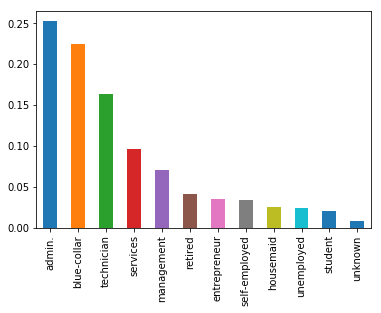

Normalised Job Category - admin. Vs Output Distribution
0    0.870274
1    0.129726
Name: y, dtype: float64


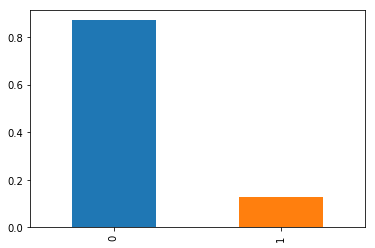

Normalised Job Category - blue-collar Vs Output Distribution
0    0.931057
1    0.068943
Name: y, dtype: float64


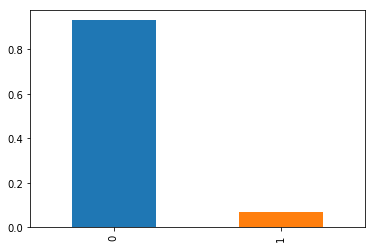

Normalised Job Category - technician Vs Output Distribution
0    0.89174
1    0.10826
Name: y, dtype: float64


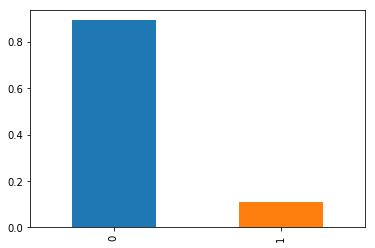

Normalised Job Category - services Vs Output Distribution
0    0.918619
1    0.081381
Name: y, dtype: float64


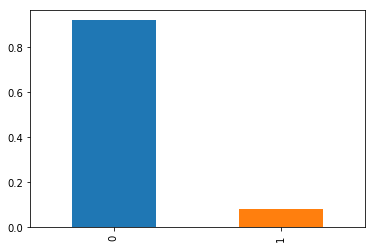

Normalised Job Category - management Vs Output Distribution
0    0.887825
1    0.112175
Name: y, dtype: float64


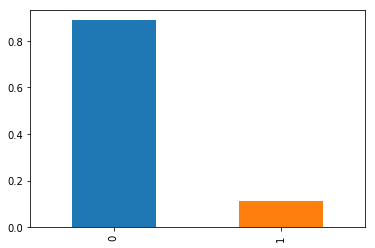

Normalised Job Category - retired Vs Output Distribution
0    0.747674
1    0.252326
Name: y, dtype: float64


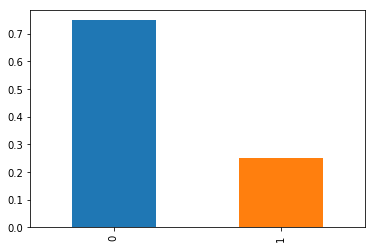

Normalised Job Category - entrepreneur Vs Output Distribution
0    0.914835
1    0.085165
Name: y, dtype: float64


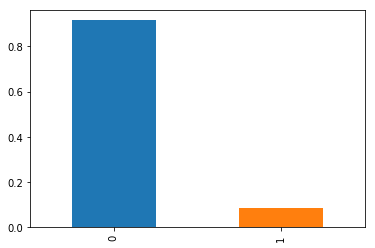

Normalised Job Category - self-employed Vs Output Distribution
0    0.895144
1    0.104856
Name: y, dtype: float64


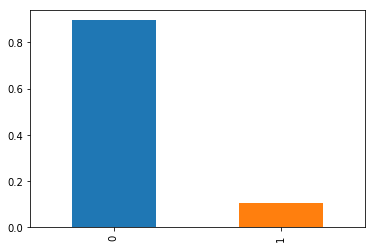

Normalised Job Category - housemaid Vs Output Distribution
0    0.9
1    0.1
Name: y, dtype: float64


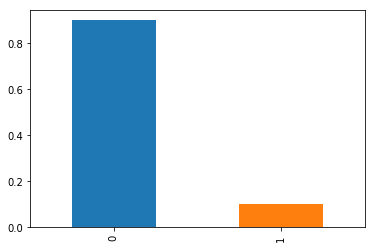

Normalised Job Category - unemployed Vs Output Distribution
0    0.857988
1    0.142012
Name: y, dtype: float64


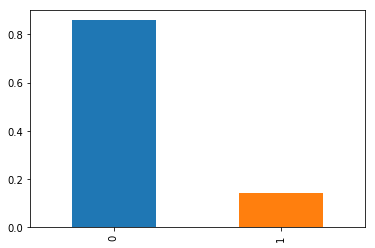

Normalised Job Category - student Vs Output Distribution
0    0.685714
1    0.314286
Name: y, dtype: float64


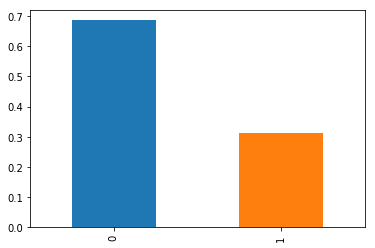

Normalised Job Category - unknown Vs Output Distribution
0    0.887879
1    0.112121
Name: y, dtype: float64


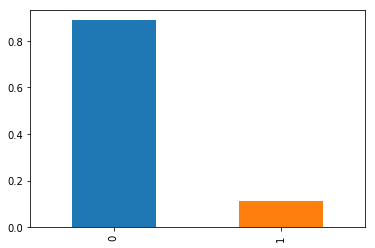

In [182]:
#Looking at column ['job']
data['job'].value_counts(normalize=True).plot.bar()
plt.show()

#Plot by job type for output variable
#X-axis - job type category
#Y-axis - count of job type

cat_jobs = data['job'].value_counts().keys()
for job_cat in cat_jobs:
    print("Normalised Job Category - {} Vs Output Distribution".format(job_cat))
    print(data.loc[data.loc[:,'job']==job_cat,'y'].value_counts(normalize=True))
    data.loc[data.loc[:,'job']==job_cat,'y'].value_counts(normalize=True).plot.bar()
    plt.show()

From above analysis two categories stand out among others where there is a higher conversion rate: People with job type as 'retired' and 'student' which is quite intuitive too.

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64


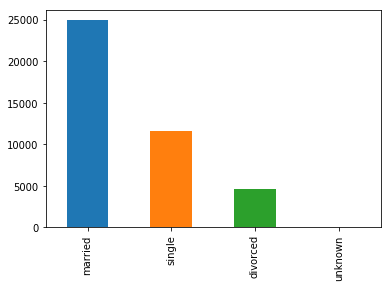

Normalised Marital Category - married Vs Output Distribution
0    0.898427
1    0.101573
Name: y, dtype: float64


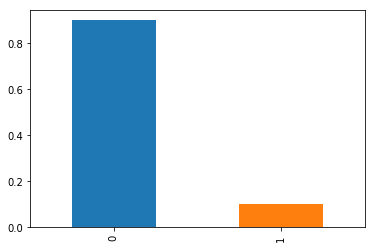

Normalised Marital Category - single Vs Output Distribution
0    0.859959
1    0.140041
Name: y, dtype: float64


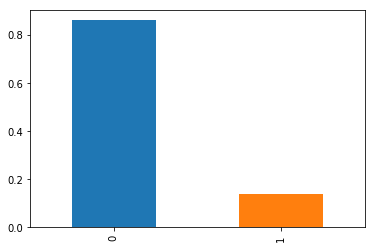

Normalised Marital Category - divorced Vs Output Distribution
0    0.896791
1    0.103209
Name: y, dtype: float64


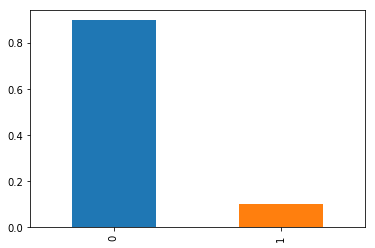

Normalised Marital Category - unknown Vs Output Distribution
0    0.85
1    0.15
Name: y, dtype: float64


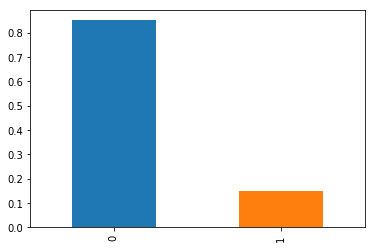

In [252]:
#Looking at column ['marital']
print(data['marital'].value_counts(normalize=True))
data['marital'].value_counts().plot.bar()
plt.show()


cat = data['marital'].value_counts().keys()
for cat_sin in cat:
    print("Normalised Marital Category - {} Vs Output Distribution".format(cat_sin))
    print(data.loc[data.loc[:,'marital']==cat_sin,'y'].value_counts(normalize=True))
    data.loc[data.loc[:,'marital']==cat_sin,'y'].value_counts(normalize=True).plot.bar()
    plt.show()

No Certain anamolies in the marital category.

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


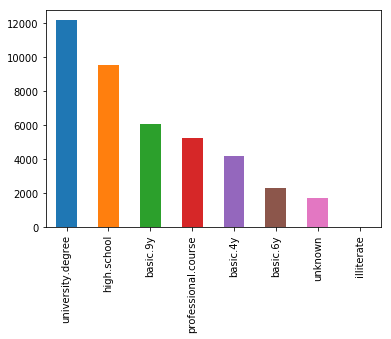

Normalised Education Category - university.degree Vs Output Distribution
0    0.862755
1    0.137245
Name: y, dtype: float64


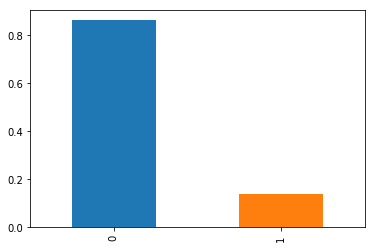

Normalised Education Category - high.school Vs Output Distribution
0    0.891645
1    0.108355
Name: y, dtype: float64


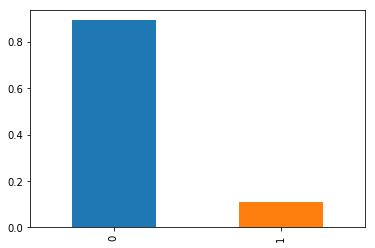

Normalised Education Category - basic.9y Vs Output Distribution
0    0.921754
1    0.078246
Name: y, dtype: float64


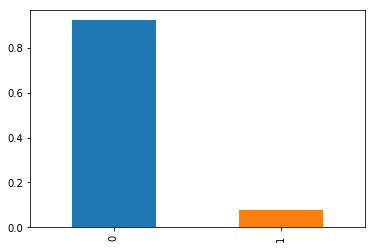

Normalised Education Category - professional.course Vs Output Distribution
0    0.886515
1    0.113485
Name: y, dtype: float64


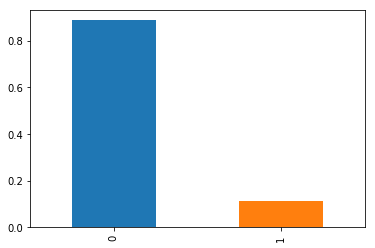

Normalised Education Category - basic.4y Vs Output Distribution
0    0.89751
1    0.10249
Name: y, dtype: float64


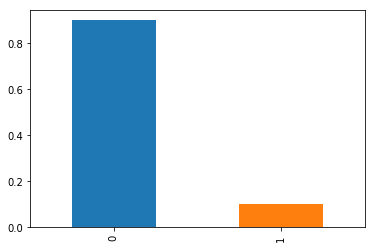

Normalised Education Category - basic.6y Vs Output Distribution
0    0.917976
1    0.082024
Name: y, dtype: float64


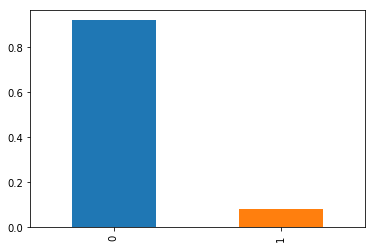

Normalised Education Category - unknown Vs Output Distribution
0    0.854997
1    0.145003
Name: y, dtype: float64


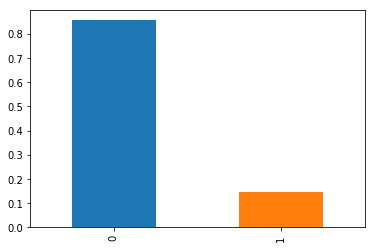

Normalised Education Category - illiterate Vs Output Distribution
0    0.777778
1    0.222222
Name: y, dtype: float64


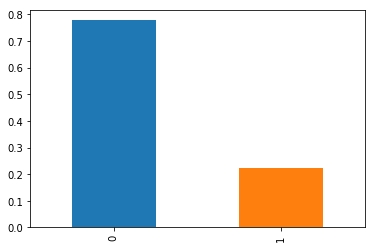

In [180]:
#Looking at column ['education']
print(data['education'].value_counts())
data['education'].value_counts().plot.bar()
plt.show()


cat = data['education'].value_counts().keys()
for cat_sin in cat:
    print("Normalised Education Category - {} Vs Output Distribution".format(cat_sin))
    print(data.loc[data.loc[:,'education']==cat_sin,'y'].value_counts(normalize=True))
    data.loc[data.loc[:,'education']==cat_sin,'y'].value_counts(normalize=True).plot.bar()
    plt.show()

There is just one anamoly in the illiterate category but the number of samples for this category are very less, so we can't really conclude anything significant.

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


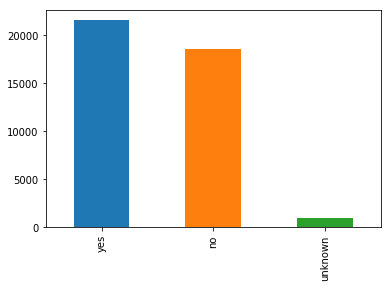

Normalised Housing Category - yes Vs Output Distribution
0    0.883806
1    0.116194
Name: y, dtype: float64


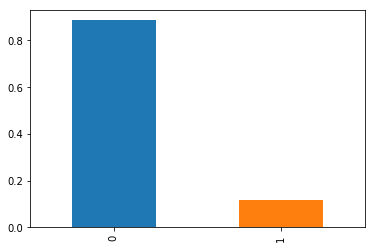

Normalised Housing Category - no Vs Output Distribution
0    0.891204
1    0.108796
Name: y, dtype: float64


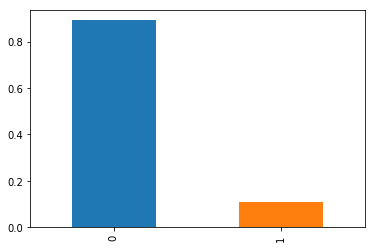

Normalised Housing Category - unknown Vs Output Distribution
0    0.891919
1    0.108081
Name: y, dtype: float64


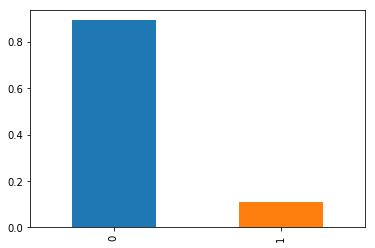

In [183]:
#Looking at column ['housing']
print(data['housing'].value_counts())
data['housing'].value_counts().plot.bar()
plt.show()


cat = data['housing'].value_counts().keys()
for cat_sin in cat:
    print("Normalised Housing Category - {} Vs Output Distribution".format(cat_sin))
    print(data.loc[data.loc[:,'housing']==cat_sin,'y'].value_counts(normalize=True))
    data.loc[data.loc[:,'housing']==cat_sin,'y'].value_counts(normalize=True).plot.bar()
    plt.show()

Nothing significant in housing column

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


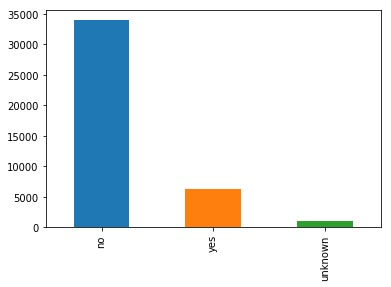

Normalised loan Category - no Vs Output Distribution
0    0.886598
1    0.113402
Name: y, dtype: float64


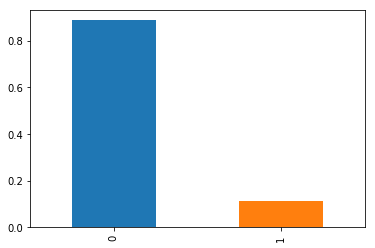

Normalised loan Category - yes Vs Output Distribution
0    0.890685
1    0.109315
Name: y, dtype: float64


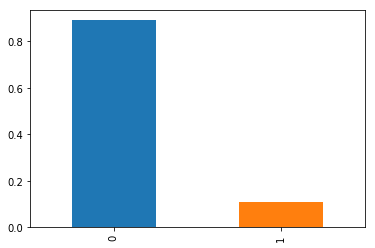

Normalised loan Category - unknown Vs Output Distribution
0    0.891919
1    0.108081
Name: y, dtype: float64


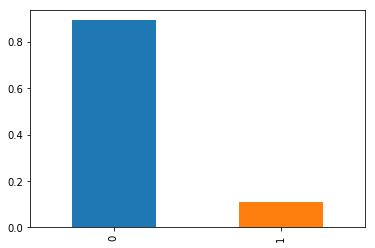

In [184]:
#Looking at column ['loan']
print(data['loan'].value_counts())
data['loan'].value_counts().plot.bar()
plt.show()


cat = data['loan'].value_counts().keys()
for cat_sin in cat:
    print("Normalised loan Category - {} Vs Output Distribution".format(cat_sin))
    print(data.loc[data.loc[:,'loan']==cat_sin,'y'].value_counts(normalize=True))
    data.loc[data.loc[:,'loan']==cat_sin,'y'].value_counts(normalize=True).plot.bar()
    plt.show()

Nothing significant found in loan

cellular     26144
telephone    15044
Name: contact, dtype: int64


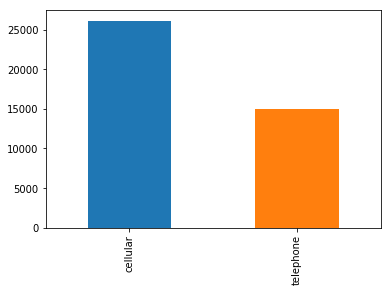

Normalised contact Category - cellular Vs Output Distribution
0    0.852624
1    0.147376
Name: y, dtype: float64


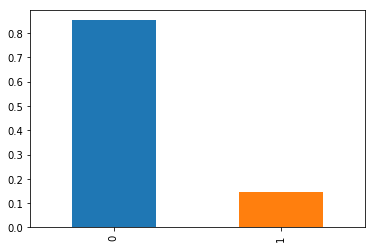

Normalised contact Category - telephone Vs Output Distribution
0    0.947687
1    0.052313
Name: y, dtype: float64


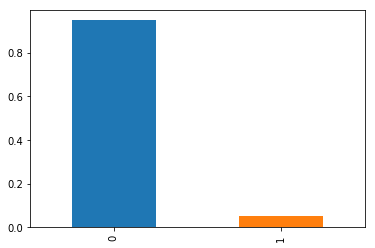

In [185]:
#Looking at column ['contact']
print(data['contact'].value_counts())
data['contact'].value_counts().plot.bar()
plt.show()


cat = data['contact'].value_counts().keys()
for cat_sin in cat:
    print("Normalised contact Category - {} Vs Output Distribution".format(cat_sin))
    print(data.loc[data.loc[:,'contact']==cat_sin,'y'].value_counts(normalize=True))
    data.loc[data.loc[:,'contact']==cat_sin,'y'].value_counts(normalize=True).plot.bar()
    plt.show()

Cellular looks like a more effective medium.

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


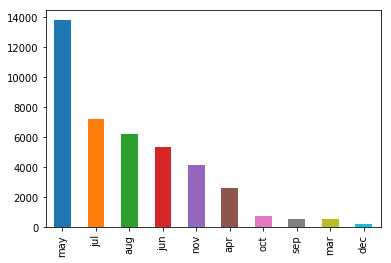

Normalised month Category - may Vs Output Distribution
0    0.935653
1    0.064347
Name: y, dtype: float64


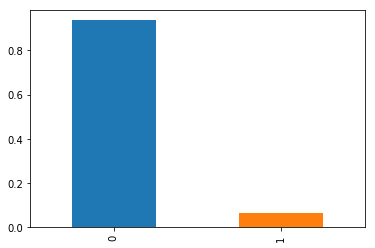

Normalised month Category - jul Vs Output Distribution
0    0.909534
1    0.090466
Name: y, dtype: float64


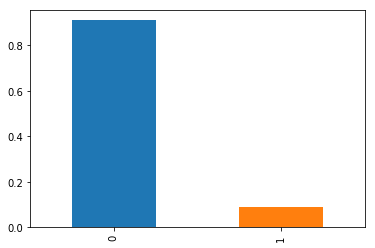

Normalised month Category - aug Vs Output Distribution
0    0.893979
1    0.106021
Name: y, dtype: float64


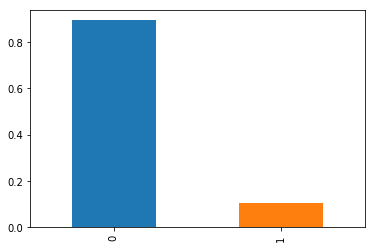

Normalised month Category - jun Vs Output Distribution
0    0.894885
1    0.105115
Name: y, dtype: float64


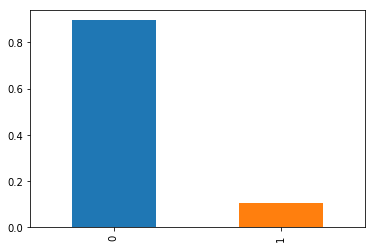

Normalised month Category - nov Vs Output Distribution
0    0.898561
1    0.101439
Name: y, dtype: float64


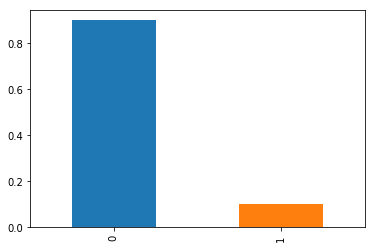

Normalised month Category - apr Vs Output Distribution
0    0.795213
1    0.204787
Name: y, dtype: float64


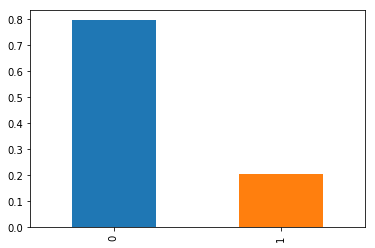

Normalised month Category - oct Vs Output Distribution
0    0.561281
1    0.438719
Name: y, dtype: float64


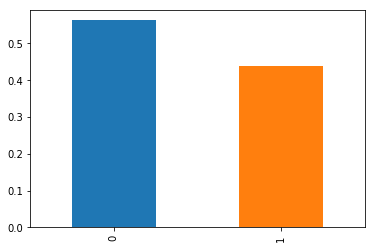

Normalised month Category - sep Vs Output Distribution
0    0.550877
1    0.449123
Name: y, dtype: float64


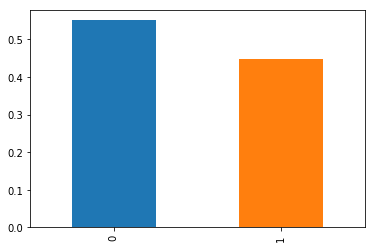

Normalised month Category - mar Vs Output Distribution
1    0.505495
0    0.494505
Name: y, dtype: float64


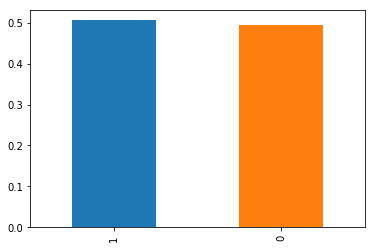

Normalised month Category - dec Vs Output Distribution
0    0.510989
1    0.489011
Name: y, dtype: float64


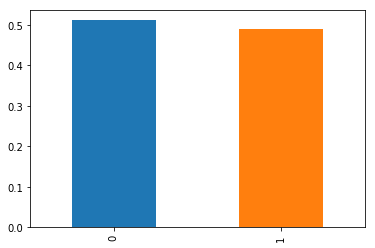

In [186]:
#Looking at column ['month']
print(data['month'].value_counts())
data['month'].value_counts().plot.bar()
plt.show()


cat = data['month'].value_counts().keys()
for cat_sin in cat:
    print("Normalised month Category - {} Vs Output Distribution".format(cat_sin))
    print(data.loc[data.loc[:,'month']==cat_sin,'y'].value_counts(normalize=True))
    data.loc[data.loc[:,'month']==cat_sin,'y'].value_counts(normalize=True).plot.bar()
    plt.show()

apr, oct, sept, mar, dec show anamolies. However, for now we can conside only apr to be of some value as the rest of months have very less data points to conclude something significant.

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


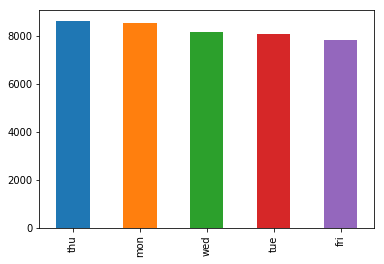

Normalised day_of_week Category - thu Vs Output Distribution
0    0.878812
1    0.121188
Name: y, dtype: float64


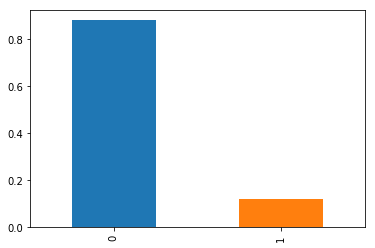

Normalised day_of_week Category - mon Vs Output Distribution
0    0.900517
1    0.099483
Name: y, dtype: float64


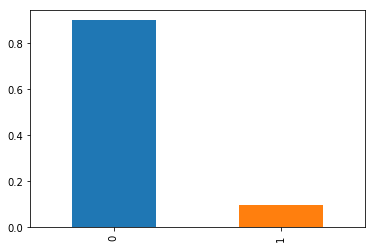

Normalised day_of_week Category - wed Vs Output Distribution
0    0.883329
1    0.116671
Name: y, dtype: float64


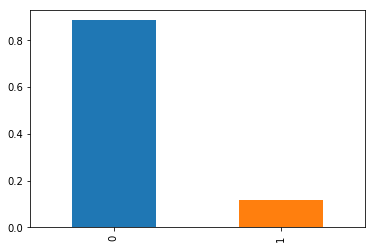

Normalised day_of_week Category - tue Vs Output Distribution
0    0.8822
1    0.1178
Name: y, dtype: float64


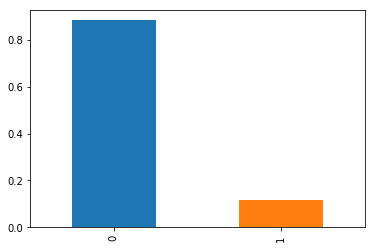

Normalised day_of_week Category - fri Vs Output Distribution
0    0.891913
1    0.108087
Name: y, dtype: float64


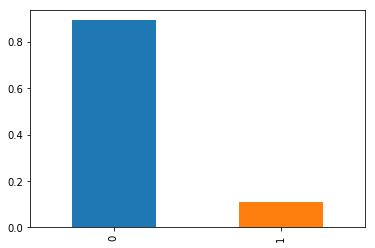

In [187]:
#Looking at column ['day_of_week']
print(data['day_of_week'].value_counts())
data['day_of_week'].value_counts().plot.bar()
plt.show()


cat = data['day_of_week'].value_counts().keys()
for cat_sin in cat:
    print("Normalised day_of_week Category - {} Vs Output Distribution".format(cat_sin))
    print(data.loc[data.loc[:,'day_of_week']==cat_sin,'y'].value_counts(normalize=True))
    data.loc[data.loc[:,'day_of_week']==cat_sin,'y'].value_counts(normalize=True).plot.bar()
    plt.show()

Mondays comparatively don't look good days.

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


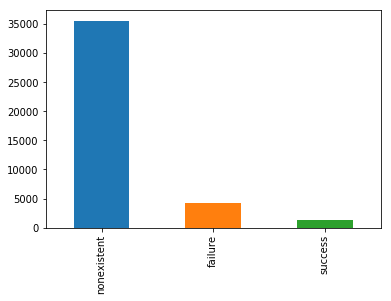

Normalised poutcome Category - nonexistent Vs Output Distribution
0    0.911678
1    0.088322
Name: y, dtype: float64


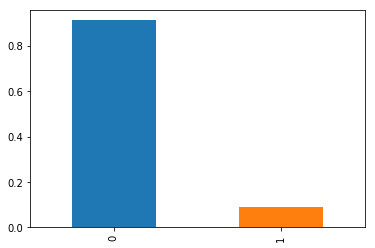

Normalised poutcome Category - failure Vs Output Distribution
0    0.857714
1    0.142286
Name: y, dtype: float64


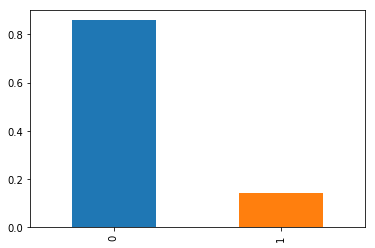

Normalised poutcome Category - success Vs Output Distribution
1    0.651129
0    0.348871
Name: y, dtype: float64


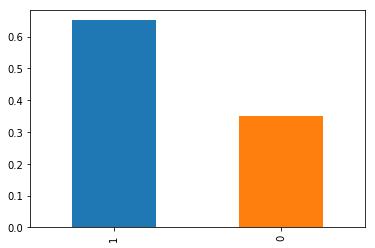

In [190]:
#Looking at column ['poutcome']
print(data['poutcome'].value_counts())
data['poutcome'].value_counts().plot.bar()
plt.show()


cat = data['poutcome'].value_counts().keys()
for cat_sin in cat:
    print("Normalised poutcome Category - {} Vs Output Distribution".format(cat_sin))
    print(data.loc[data.loc[:,'poutcome']==cat_sin,'y'].value_counts(normalize=True))
    data.loc[data.loc[:,'poutcome']==cat_sin,'y'].value_counts(normalize=True).plot.bar()
    plt.show()

High chance of success if previous outcome was success - can't say with a lot of confidence.

Above analysis was just to merely understand the distribution of data. Confidence of deductions can only be made based on a statistical test.

In [196]:
#Binning the ages to have a better analysis

data.loc[data["age"] < 30,  'age_group'] = 20
data.loc[(data["age"] >= 30) & (data["age"] <= 39), 'age_group'] = 30
data.loc[(data["age"] >= 40) & (data["age"] <= 49), 'age_group'] = 40
data.loc[(data["age"] >= 50) & (data["age"] <= 59), 'age_group'] = 50
data.loc[data["age"] >= 60, 'age_group'] = 60

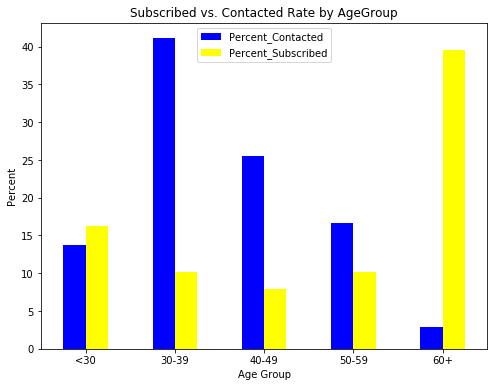

      Percent_Contacted  Percent_Subscribed  age
20.0          13.763718           16.263891   20
30.0          41.123628           10.125162   30
40.0          25.555987            7.923238   40
50.0          16.660192           10.157389   50
60.0           2.896475           39.564124   60


In [237]:
data['age_group'].value_counts()
age_group_y_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
age_df = pd.DataFrame(data['age_group'].value_counts())
age_df['Percent_Contacted'] = (age_df['age_group']/age_df['age_group'].sum())*100
age_df['Percent_Subscribed'] = age_group_y_pct.loc[1]
age_df.drop('age_group',axis = 1,inplace = True)

age_df['age'] = [30,40,50,20,60]
age_df = age_df.sort_values('age',ascending = True)

plot_age = age_df[['Percent_Contacted','Percent_Subscribed']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','yellow'))
plt.xlabel('Age Group')
plt.ylabel('Percent')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscribed vs. Contacted Rate by AgeGroup')
plt.show()

print(age_df)

Insight : ~56% of subscriptions came from the youngest(<30) and the eldest(>60) while their contacted percentage of total was just 15%. Thus there should be more focus on 

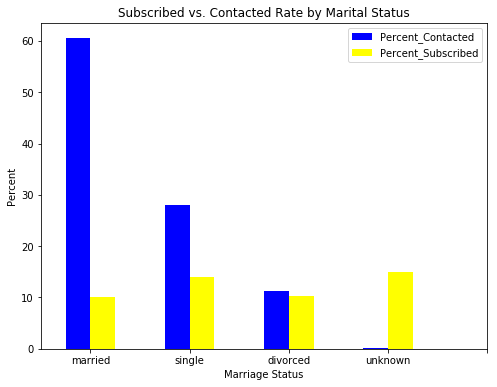

          Percent_Contacted  Percent_Subscribed   marital
married           60.522482           10.157253   married
single            28.085850           14.004149    single
divorced          11.197436           10.320902  divorced
unknown            0.194231           15.000000   unknown


In [256]:
marital_y_pct = pd.crosstab(data['y'],data['marital']).apply(lambda x: x/x.sum() * 100)
marital_df = pd.DataFrame(data['marital'].value_counts())
marital_df['Percent_Contacted'] = (marital_df['marital']/marital_df['marital'].sum())*100
marital_df['Percent_Subscribed'] = marital_y_pct.loc[1]
marital_df.drop('marital',axis = 1,inplace = True)

marital_df['marital'] = ["married","single", "divorced", "unknown"]

plot_age = marital_df[['Percent_Contacted','Percent_Subscribed']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','yellow'))
plt.xlabel('Marriage Status')
plt.ylabel('Percent')
plt.xticks(np.arange(5), ("married","single", "divorced", "unknown"),rotation = 'horizontal')
plt.title('Subscribed vs. Contacted Rate by Marital Status')
plt.show()

print(marital_df)


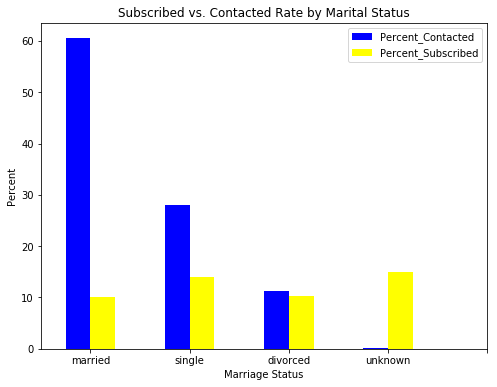

          marital  Percent_Contacted  Percent_Subscribed
married     24928          60.522482           10.157253
single      11568          28.085850           14.004149
divorced     4612          11.197436           10.320902
unknown        80           0.194231           15.000000


In [260]:
marital_y_pct = pd.crosstab(data['y'],data['marital']).apply(lambda x: x/x.sum() * 100)
marital_df = pd.DataFrame(data['marital'].value_counts())
marital_df['Percent_Contacted'] = (marital_df['marital']/marital_df['marital'].sum())*100
marital_df['Percent_Subscribed'] = marital_y_pct.loc[1]
#marital_df.drop('marital',axis = 1,inplace = True)

#marital_df['marital'] = ["married","single", "divorced", "unknown"]

plot_age = marital_df[['Percent_Contacted','Percent_Subscribed']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','yellow'))
plt.xlabel('Marriage Status')
plt.ylabel('Percent')
plt.xticks(np.arange(5), ("married","single", "divorced", "unknown"),rotation = 'horizontal')
plt.title('Subscribed vs. Contacted Rate by Marital Status')
plt.show()

print(marital_df)


In [262]:
marital_df

,marital,Percent_Contacted,Percent_Subscribed
married,24928,60.522482,10.157253
single,11568,28.085850,14.004149
divorced,4612,11.197436,10.320902
unknown,80,0.194231,15.000000
